In [3]:
# Going to be performing a linear regression on a housing dataset




# Here is the order of the process:
# 1) Clean the dataset
#     - find and deal with outliers
#     - find and deal with missing data (numerical)
    

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:../DATA/Ames_Housing_Data.csv')

In [6]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [8]:
# Are there sale prices that are outliers against features that are highly correlated to the features?

In [9]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

In [10]:
# Lets check outliers for Overall Qual and GR Liv Area

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

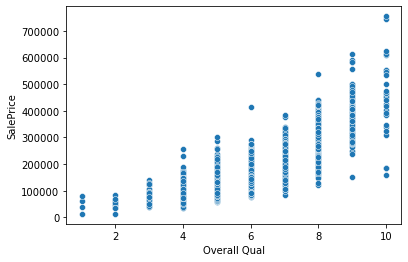

In [11]:
sns.scatterplot(x='Overall Qual', y = 'SalePrice', data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

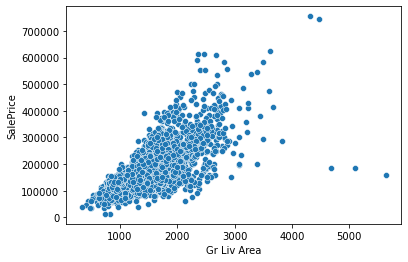

In [12]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [13]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [14]:
df[(df['Gr Liv Area']>4500) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [15]:
# Three houses are for some reason very high quality and very low price loc = [1498,2180,2181].
# Let's drop them

In [16]:
df= df.drop([1498,2180,2181],axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

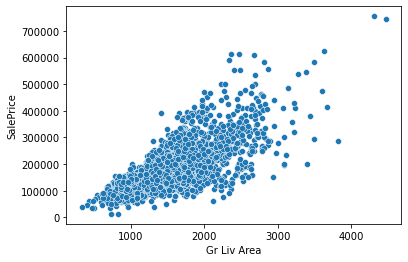

In [17]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

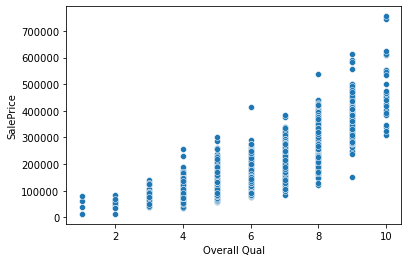

In [18]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [19]:
# The three obvious outliers seem to be gone, the rest of the data seems to be under a more linear relationship between the variables

In [20]:
# Are there any useless volumns? 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [22]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [23]:
# Can drop PID as its just an ID but we already have index as ID

In [24]:
df = df.drop('PID',axis=1)

In [25]:
len(df.columns)

80

In [26]:
# Let's find missing values

In [27]:
df.isnull().sum().sort_values()

MS SubClass          0
Sale Condition       0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
Length: 80, dtype: int64

In [75]:
(100*df.isnull().sum()/len(df)).sort_values()

MS SubClass        0.000000
Bedroom AbvGr      0.000000
Half Bath          0.000000
Full Bath          0.000000
Bsmt Half Bath     0.000000
                    ...    
Fireplace Qu      48.547009
Fence             80.478632
Alley             93.230769
Misc Feature      96.410256
Pool QC           99.589744
Length: 80, dtype: float64

In [ ]:
# Need a function that is going to calculate percentage of null values for me so I can check 
# if altering the df changes my missing values

In [29]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [30]:
percent_nan = percent_missing(df)

<AxesSubplot:>

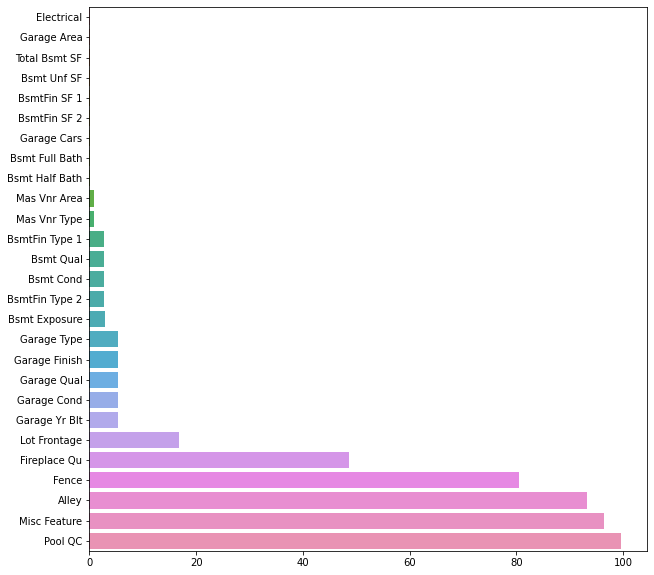

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(y=percent_nan.index,x=percent_nan)

(0.0, 1.0)

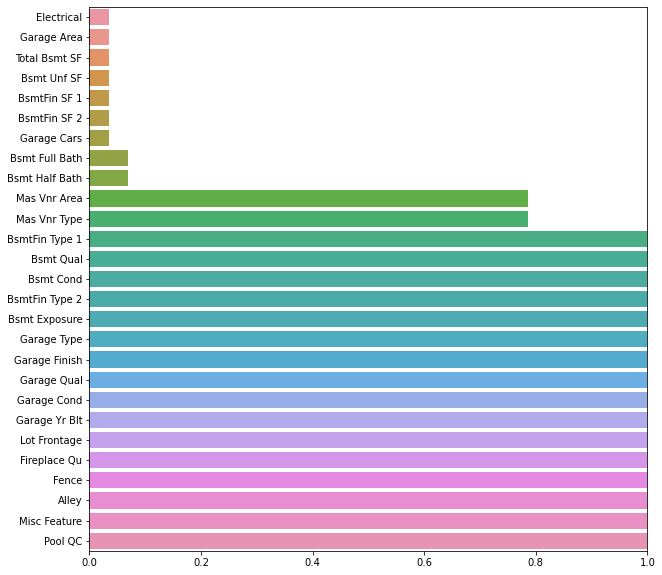

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)
plt.xlim(0,1)

In [46]:
percent_nan[percent_nan <1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [47]:
# how many rows are these percentages?

In [49]:
100/len(df)

0.0341646737273659

In [52]:
# Is the row missing electrical the same as garage area for example?

In [55]:
df[df['Electrical'].isnull()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [62]:
# Let's see if dropping the row that is missing electrical and garage cars will also reduce my missing value rates

In [63]:
df=df.dropna(axis = 0, subset = ['Electrical','Garage Cars'])

In [64]:
percent_nan = percent_missing(df)

In [65]:
percent_nan[percent_nan <1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [36]:
# Since there are so many columns with missing values where basement is mentioned maybe should look if they 
# are for the same houses.

# What if they just don't have a basement?

In [41]:
df[df['Bsmt Unf SF'].isnull()][['Total Bsmt SF','BsmtFin SF 1','BsmtFin SF 2','Bsmt Full Bath','Bsmt Half Bath']]

,Total Bsmt SF,BsmtFin SF 1,BsmtFin SF 2,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN


In [42]:
# This makes it much easier for loc 1341

# Can fill it with basement = 'None' since it's probably just missing a basement

In [70]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [71]:
percent_nan = percent_missing(df)

(0.0, 1.0)

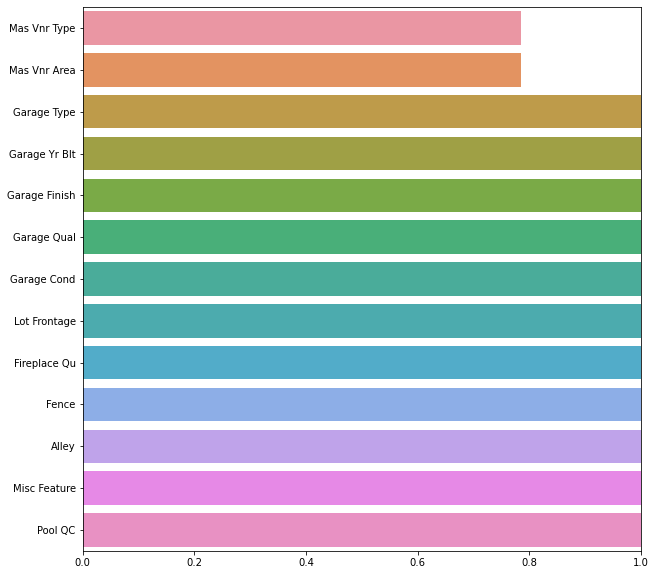

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)
plt.xlim(0,1)

In [73]:
# Looks like Mas Vnr is for houses that are missing masonry vaneer so let's just fill those like we did with basement

In [76]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [81]:
percent_nan = percent_missing(df)

<AxesSubplot:>

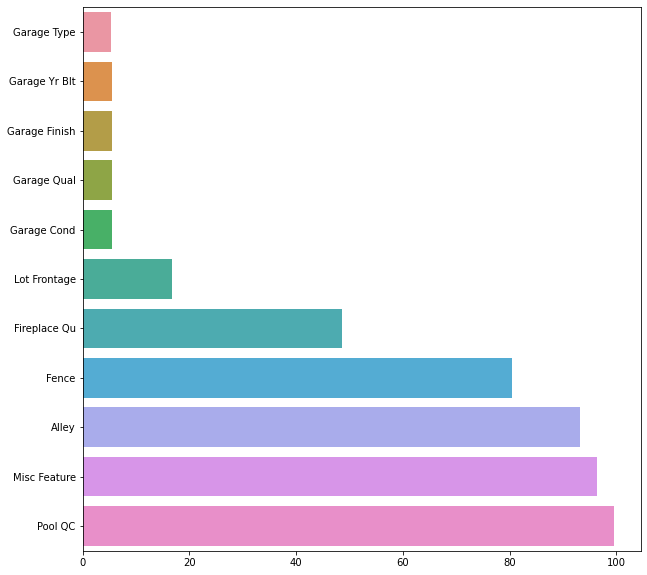

In [79]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)

In [82]:
# Since there are no more features that are under the 1% missing data threshold I won't drop any more rows
# Garage columns all seem to be missing the same amount of data and in the description it says if they are missing data
# then the house just doesn't have a garage so let's normalize this

In [84]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [85]:
percent_nan=percent_missing(df)

<AxesSubplot:>

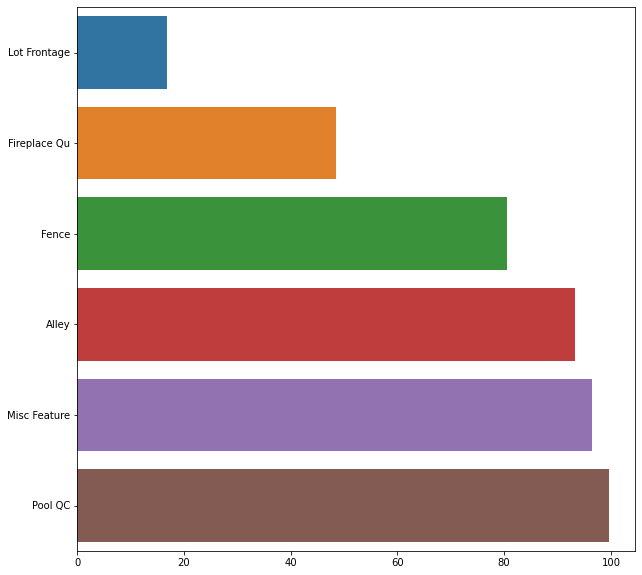

In [86]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)

In [88]:
# Will be dropping columns that are missing such a high percentage of rows like The bottom 4 here ^^

In [90]:
df = df.drop(['Fence','Alley','Misc Feature','Pool QC'],axis = 1)

In [91]:
# And let's inspect the other features

In [92]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [93]:
# Since these are just string values I will fill NA's with None again

In [94]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [96]:
percent_nan=percent_missing(df)
percent_nan

Lot Frontage    16.752137
dtype: float64

In [101]:
# All that is missing is Lot Frontage
# In this case what I can do is look at the average of this feature 
# in  the feature 'Neighborhoods' and fill missing values with the mean for that neighborhood
# This method assumes that neighborhood have pretty unifrom Lot Frontages for all the houses there
# which I am okay with since that is how it usually

In [113]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2007,WD,Normal,330000
2788,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,137000
2892,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,230000


In [114]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [115]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [116]:
df[df['Lot Frontage'].isnull()]['Neighborhood']

2256    GrnHill
2788    Landmrk
2892    GrnHill
Name: Neighborhood, dtype: object

In [117]:
# Since GrnHill and Landmrk don't have means of their Lot Frontages I will assume they don't have them

In [118]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [119]:
percent_nan=percent_missing(df)
percent_nan

Series([], dtype: float64)

In [120]:
# Yay no more missing values!